# 📌 02 – Feature Engineering for Web Log Anomaly Detection

“This notebook applies feature engineering to transform raw HTTP requests into meaningful numerical security features used for machine learning models.”


*– Imports :*

In [6]:

import sys
import os

# Add src/ to path
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from features import build_features

sns.set(style="darkgrid")


*— Load parsed dataset (cleaned CSV):*

In [7]:
df = pd.read_csv("../data/csic_database.csv")
df.head()

,method,url,protocol,host,user_agent,cookie,content_type,content_length,body,label
0,GET,http://localhost:8080/tienda1/index.jsp,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,NaN,NaN,0
1,GET,http://localhost:8080/tienda1/publico/anadir.j...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,NaN,NaN,0
2,POST,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,68.0,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,GET,http://localhost:8080/tienda1/publico/autentic...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,NaN,NaN,0


*— Generate features using build_features() :*

In [8]:
X, feature_cols = build_features(df)

X.head(), feature_cols


(   url_length  param_count  has_special_chars  has_sql  method_encoded  \
 0          39            0                  0        0               0   
 1         117            4                  1        0               0   
 2          48            0                  0        0               1   
 3           0            0                  0        0               0   
 4         116            4                  1        0               0   
 
    payload_length  url_entropy  
 0               0     4.208479  
 1               0     4.759970  
 2               0     4.280188  
 3               0     0.000000  
 4               0     4.785122  ,
 ['url_length',
  'param_count',
  'has_special_chars',
  'has_sql',
  'method_encoded',
  'payload_length',
  'url_entropy'])

*— Summary statistics :*

In [9]:
X.describe()


,url_length,param_count,has_special_chars,has_sql,method_encoded,payload_length,url_entropy
count,123042.000000,123042.000000,123042.000000,123042.000000,123042.000000,123042.0,123042.000000
mean,60.846987,0.929455,0.112116,0.034257,0.207896,0.0,3.478886
std,69.877066,2.827205,0.315511,0.181888,0.405804,0.0,1.815945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.161313
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.280470
75%,58.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.363521
max,886.000000,12.000000,1.000000,1.000000,1.000000,0.0,5.397270


*— Correlation matrix :*

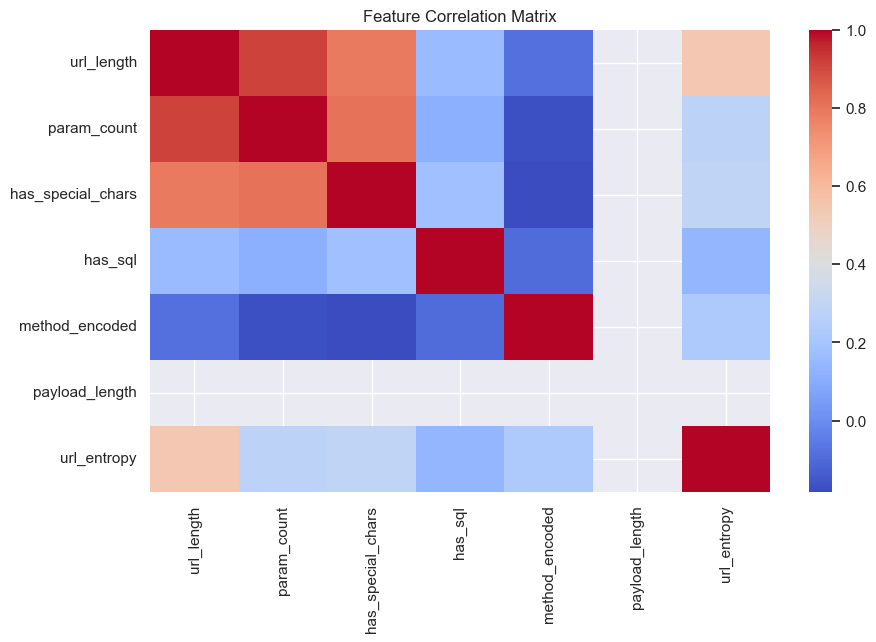

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()